In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
df = pd.read_csv("estadisticas_partidos.csv")
df =  df.sort_index(axis=0, ascending=False, ignore_index=True)

In [13]:
df

,team_home,team_away,score_home,score_away,expected_goals_home,expected_goals_away,posession_home,posession_away,total_shots_home,total_shots_away,...,duels_won_home,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away,clearences_home,clearences_away
0,Universidad de Chile,Huachipato,1,3,2.72,2.65,43,57,17,10,...,57,55,16,15,23,22,8,11,20,11
1,Curicó Unido,Coquimbo Unido,1,0,3.15,0.91,56,44,19,14,...,34,40,7,14,15,17,8,7,15,29
2,Deportes Copiapó,Colo Colo,2,5,1.40,1.42,49,51,12,10,...,45,39,9,12,24,12,12,17,15,25
3,Everton de Viña del Mar,Universidad Católica,0,3,2.87,1.14,47,53,20,12,...,40,48,7,13,18,18,7,6,7,18
4,Cobresal,Unión La Calera,3,1,1.65,1.37,47,53,16,17,...,48,45,13,12,22,20,11,9,23,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Deportes Magallanes,Coquimbo Unido,2,3,1.62,1.82,57,43,13,15,...,34,32,9,11,10,6,5,1,16,20
236,Deportes Copiapó,Everton de Viña del Mar,2,0,1.21,0.59,36,64,10,12,...,35,35,11,9,13,9,7,2,28,13
237,Unión Española,Cobresal,1,0,1.09,0.54,65,35,26,9,...,59,66,18,14,18,19,3,11,24,24
238,Huachipato,Audax Italiano,2,0,1.34,0.45,64,36,12,13,...,45,35,13,9,12,12,7,4,19,28


In [14]:
df.columns

Index(['team_home', 'team_away', 'score_home', 'score_away',
       'expected_goals_home', 'expected_goals_away', 'posession_home',
       'posession_away', 'total_shots_home', 'total_shots_away',
       'shots_on_target_home', 'shots_on_target_away', 'shots_off_target_home',
       'shots_off_target_away', 'blocked_shots_home', 'blocked_shots_away',
       'corner_kicks_home', 'corner_kicks_away', 'offsides_home',
       'offsides_away', 'fouls_home', 'fouls_away', 'yellow_cards_home',
       'yellow_cards_away', 'red_cards_home', 'red_cards_away',
       'free_kicks_home', 'free_kicks_away', 'throw_ins_home',
       'throw_ins_away', 'goal_kicks_home', 'goal_kicks_away',
       'shots_inside_box_home', 'shots_inside_box_away',
       'shots_outside_box_home', 'shots_outside_box_away',
       'goalkeeper_saves_home', 'goalkeeper_saves_away', 'passes_home',
       'passes_away', 'accurate_passes_home', 'accurate_passes_away',
       'long_balls_home', 'long_balls_away', 'crosses_home',

In [21]:
last_games = 10
# W = win, D = draw, L = lose
streak_home = []
streak_away = []
# W = home_win, D = draw, L = home_lose
results = []
for i in range(0, len(df)):
    team_home = df.iloc[i]["team_home"]
    team_away = df.iloc[i]["team_away"]
    home_search = last_games
    away_search = last_games
    info_home = []
    info_away = []
    df_match1 = df[df["team_home"] == team_home]
    df_match2 = df[df["team_away"] == team_home]
    df_match3 = df[df["team_home"] == team_away]
    df_match4 = df[df["team_away"] == team_away]
    df_match_index = sorted(list(set(df_match1.index) | set(df_match2.index) | set(
        df_match3.index) | set(df_match4.index)), reverse=True)
    for j in df_match_index:
        if i-j <= 0:
            continue
        if away_search == 0 and home_search == 0:
            streak_home.append(info_home)
            streak_away.append(info_away)
            if df.iloc[i]["score_home"] > df.iloc[i]["score_away"]:
                results.append("W")
            elif df.iloc[i]["score_home"] == df.iloc[i]["score_away"]:
                results.append("D")
            elif df.iloc[i]["score_home"] < df.iloc[i]["score_away"]:
                results.append("L")
            break
        # Buscamos los partidos anteriores del equipo de CASA

        if home_search > 0:
            if team_home == df.iloc[j]["team_home"]:
                # Casa gana
                if df.iloc[j]["score_home"] > df.iloc[j]["score_away"]:
                    home_search -= 1
                    info_home.append("W")
                # Casa pierde
                elif df.iloc[j]["score_home"] < df.iloc[j]["score_away"]:
                    home_search -= 1
                    info_home.append("L")
                # Casa empata
                elif df.iloc[j]["score_home"] == df.iloc[j]["score_away"]:
                    home_search -= 1
                    info_home.append("D")
            elif team_home == df.iloc[j]["team_away"]:
                # Visita gana
                if df.iloc[j]["score_away"] > df.iloc[j]["score_home"]:
                    home_search -= 1
                    info_home.append("W")
                # Visita pierde
                elif df.iloc[j]["score_away"] < df.iloc[j]["score_home"]:
                    home_search -= 1
                    info_home.append("L")
                # Visita empata
                elif df.iloc[j]["score_away"] == df.iloc[j]["score_home"]:
                    home_search -= 1
                    info_home.append("D")

        # Buscamos los partidos anteriores del equipo de VISITA
        if away_search > 0:
            if team_away == df.iloc[j]["team_home"]:
                # Casa gana
                if df.iloc[j]["score_home"] > df.iloc[j]["score_away"]:
                    away_search -= 1
                    info_away.append("W")
                # Casa pierde
                elif df.iloc[j]["score_home"] < df.iloc[j]["score_away"]:
                    away_search -= 1
                    info_away.append("L")
                # Casa empata
                elif df.iloc[j]["score_home"] == df.iloc[j]["score_away"]:
                    away_search -= 1
                    info_away.append("D")
            elif team_away == df.iloc[j]["team_away"]:
                # Visita gana
                if df.iloc[j]["score_away"] > df.iloc[j]["score_home"]:
                    away_search -= 1
                    info_away.append("W")
                # Visita pierde
                elif df.iloc[j]["score_away"] < df.iloc[j]["score_home"]:
                    away_search -= 1
                    info_away.append("L")
                # Visita empata
                elif df.iloc[j]["score_away"] == df.iloc[j]["score_home"]:
                    away_search -= 1
                    info_away.append("D")

In [22]:
X = []
Y = []
for i in range(len(results)):
    home_wins = streak_home[i].count("W")
    home_draws = streak_home[i].count("D")
    home_lose = streak_home[i].count("L")

    away_wins = streak_away[i].count("W")
    away_draws = streak_away[i].count("D")
    away_lose = streak_away[i].count("L")

    X.append([home_wins, home_draws, home_lose,
              away_wins, away_draws, away_lose])
    if results[i] == "W":
        Y.append([1, 0, 0])
    elif results[i] == "D":
        Y.append([0, 1, 0])
    elif results[i] == "L":
        Y.append([0, 0, 1])

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

model = model = models.Sequential()
model.add(layers.InputLayer(input_shape=(len(X[0]),)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
# # Compilamos el modelo
model.compile(loss='categorical_crossentropy',
              optimizer="adam", metrics=['accuracy',])

# # Entrenamos el modelo
history = model.fit(X_train, y_train, verbose=1, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
4/4 [==============================] - 1s 40ms/step - loss: 1.3340 - accuracy: 0.3554 - val_loss: 1.0738 - val_accuracy: 0.3871
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1712 - accuracy: 0.3388 - val_loss: 1.0748 - val_accuracy: 0.4839
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1377 - accuracy: 0.3884 - val_loss: 1.1015 - val_accuracy: 0.3548
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0628 - accuracy: 0.4132 - val_loss: 1.1499 - val_accuracy: 0.2903
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0502 - accuracy: 0.4545 - val_loss: 1.1368 - val_accuracy: 0.2903
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0321 - accuracy: 0.4545 - val_loss: 1.1224 - val_accuracy: 0.3226
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0189 - accuracy: 0.4628 - val_loss: 1.1177 - val_accuracy: 0.3548
Epoch 8/50
4/4 [===========

1/1 [==============================] - 0s 49ms/step
Matriz de Confusión:


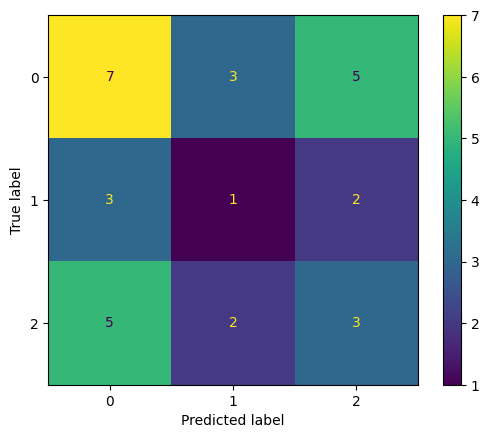

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


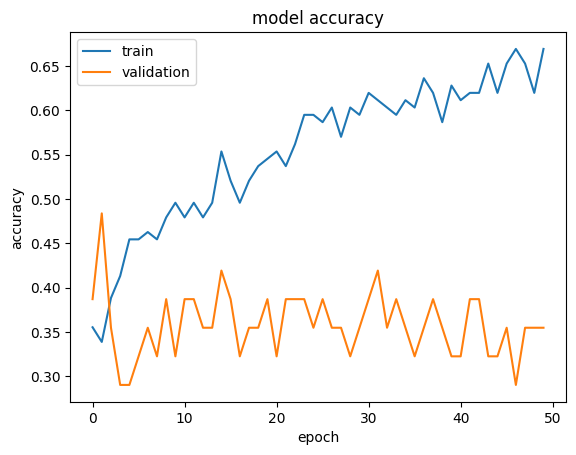

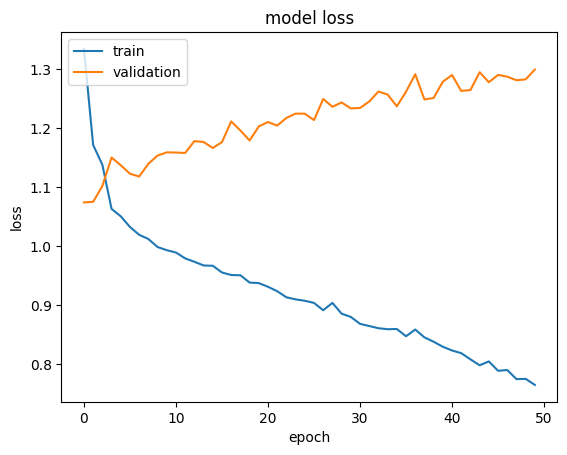

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
y_prob = model.predict(X_test)
y_test_metrics = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_prob, axis=1)


# Matriz de confusión
conf_matrix = confusion_matrix(y_test_metrics, y_pred)
print('Matriz de Confusión:')
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
print(classification_report(y_test_metrics, y_pred))


              precision    recall  f1-score   support

           0       0.47      0.47      0.47        15
           1       0.17      0.17      0.17         6
           2       0.30      0.30      0.30        10

    accuracy                           0.35        31
   macro avg       0.31      0.31      0.31        31
weighted avg       0.35      0.35      0.35        31



In [11]:
home_win = 0
away_win = 0
draw = 0
for i in range(len(df)):
    if df.iloc[i]["score_home"] > df.iloc[i]["score_away"]:
        home_win +=1
    elif df.iloc[i]["score_away"] > df.iloc[i]["score_home"]:
        away_win +=1
    elif df.iloc[i]["score_away"] == df.iloc[i]["score_home"]:
        draw +=1
    df.iloc[i]['duels_won_home'] > df.iloc[i]['duels_won_away']

total = len(df)
home_win_percentage = home_win/total
away_win_percentage = away_win/total
draw_perentage = draw/total

In [12]:
print(home_win_percentage)
print(away_win_percentage)
print(draw_perentage)

0.4041666666666667
0.35
0.24583333333333332
